# Práctica: Estadística descriptiva con Pandas
 
## Prevalencia de desórdenes de salud mental a nivel mundial

Después de tu experiencia exitosa en el gobierno Uruguayo recibiste una oferta para trabajar en la OMS en un área encargada de analizar métricas de salud mental. Ahora tienes el reto de encontrar qué variables demográficas están relacionadas a una mayor prevalencia de desórdenes de salud mental en los distintos países. 

Primero carguemos los datos que se te han brindado para esta tarea. Estos provienen del portal [Data World](https://data.world/vizzup/mental-health-depression-disorder-data).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

df_age = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-age.csv"
)
df_subsdis = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-subsdis.csv"
)

/home/renato/.virtualenvs/python/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Depresión según edad

En el DataFrame `df_age` encontrarás datos de prevalencia de depresión según grupo etario en los diferentes países. Dale un primer vistazo a la tabla:

In [2]:
df_age.head()

,entity,code,year,20_24_years_old,10_14_years_old,all_ages,70_years_old,30_34_years_old,15_19_years_old,25_29_years_old,50_69_years_old,age_standardized,15_49_years_old
0,Afghanistan,AFG,2017,4.386172,1.618270,3.050785,5.279772,5.749905,3.433750,5.105028,6.131183,4.136347,5.010372
1,Albania,ALB,2017,2.437424,0.900396,2.607896,4.399558,2.401418,2.004014,2.398396,3.664052,2.208414,2.487747
2,Algeria,DZA,2017,3.854475,1.757578,3.691020,4.848270,4.630534,3.404122,4.256386,5.402483,3.661094,4.522808
3,American Samoa,ASM,2017,2.885708,1.063623,2.787788,5.746022,2.971754,2.438167,2.862544,5.451378,2.939668,3.115501
4,Andean Latin America,NaN,2017,2.884113,1.024932,2.538325,4.663443,2.966047,2.354958,2.933790,4.408046,2.610385,2.969004


### Estadística sumaria

- Elabora un reporte que incluya medidas de tendencia central y dispersión de los datos de prevalencia de depresión en cada uno de los grupos etarios presentes en la tabla. Considera también métricas acerca de la forma de la distribución (asimetría y curtosis).

In [3]:
# Escribe tu respuesta aquí
age_groups = df_age.drop(
    columns=["entity", "code", "year", "all_ages", "age_standardized"]
)
report = age_groups.describe()

skew = age_groups.skew()
kurt = age_groups.kurtosis()

skew.name = "skew"
kurt.name = "kurtosis"

pd.concat([report, skew.to_frame().T, kurt.to_frame().T])

,20_24_years_old,10_14_years_old,70_years_old,30_34_years_old,15_19_years_old,25_29_years_old,50_69_years_old,15_49_years_old
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,3.706926,1.397120,6.046412,3.994721,3.056514,3.829041,5.577609,3.987390
std,1.052299,0.417481,1.487770,0.996078,0.865632,0.993749,0.975802,0.940574
min,1.780428,0.747197,3.324191,2.268459,1.558497,1.986453,3.297842,2.330373
25%,3.042508,1.072127,4.805046,3.240232,2.482908,3.142142,4.796985,3.302787
50%,3.423213,1.273278,5.800674,3.867810,2.839126,3.663979,5.504972,3.842542
75%,4.185398,1.615594,7.358498,4.579750,3.415515,4.379901,6.306789,4.564212
max,10.381345,3.164350,11.299540,8.790512,8.550650,9.441284,9.300100,8.961353
skew,1.829072,1.115200,0.577767,0.939213,1.994705,1.284770,0.369266,1.209263
kurtosis,6.841010,1.288080,-0.146975,1.734563,7.752464,3.742199,0.339625,3.015201


- ¿Cuál o cuáles son los grupos etarios con mayor prevalencia de depresión? ¿Y con menor prevalencia? Elabora un gráfico para ilustrar tus resultados (sugerencia: usa la función violinplot del paquete seaborn).   

/tmp/ipykernel_19920/2198247185.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


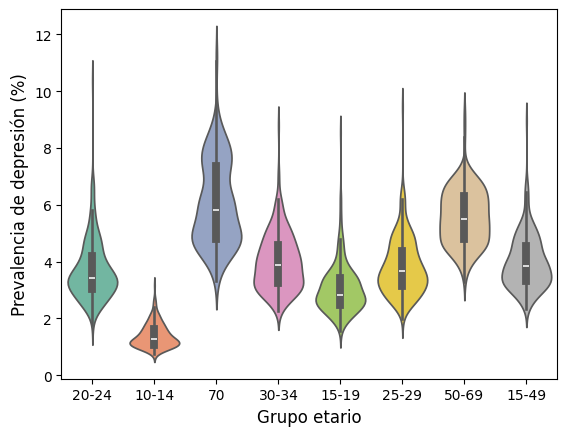

In [4]:
ax = sns.violinplot(data=age_groups, palette="Set2")
labels = age_groups.columns.to_list()
for i in range(len(labels)):
    labels[i] = labels[i].replace("_years_old", "")
    labels[i] = labels[i].replace("_", "-")
ax.set_xticklabels(labels)
ax.set_ylabel("Prevalencia de depresión (%)", size=12)
ax.set_xlabel("Grupo etario", size=12)
plt.show()

Text(0, 0.5, 'Prevalencia de depresión (%)')

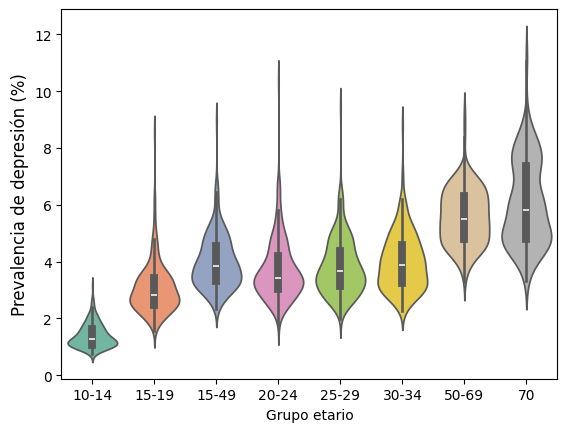

In [5]:
# Solución alternativa
new_age_groups = age_groups.rename(
    columns={
        "20_24_years_old": "20-24",
        "10_14_years_old": "10-14",
        "70_years_old": "70",
        "30_34_years_old": "30-34",
        "15_19_years_old": "15-19",
        "25_29_years_old": "25-29",
        "50_69_years_old": "50-69",
        "15_49_years_old": "15-49",
    }
)
new_age_groups = new_age_groups.loc[
    :, ["10-14", "15-19", "15-49", "20-24", "25-29", "30-34", "50-69", "70"]
]
new_age_groups.rename_axis("Grupo etario", axis="columns", inplace=True)
ax = sns.violinplot(data=new_age_groups, palette="Set2")
ax.set_ylabel("Prevalencia de depresión (%)", size=12)

## Prevalencia de desórdenes de salud mental a nivel mundial

En el DataFrame `df_subsdis` encontrarás datos de prevalencia de de desórdenes de salud mental de los diferentes países. Dale un primer vistazo a la tabla:

In [6]:
df_subsdis.head()

,entity,code,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
0,Afghanistan,AFG,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
1,Albania,ALB,2017,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
2,Algeria,DZA,2017,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191
3,American Samoa,ASM,2017,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277
4,Andean Latin America,NaN,2017,0.201471,0.881737,0.355475,4.267738,0.661481,2.610385,1.533573


### Estadística sumaria

- Elabora un reporte que incluya medidas de tendencia central y dispersión basadas en cuantiles (mediana y rango intercuartílico) de los datos de prevalencia de cada una de las condiciones de salud mental presentes en la tabla (esquizofrenia, desorden bipolar, desórdenes alimenticios, desórdenes de ansiedad, desorden de consumo de drogas).  

In [7]:
# Escribe tu respuesta aquí
disorders = df_subsdis.drop(columns=["entity", "code", "year"])

median = disorders.median()
median.name = "median"

iqr = disorders.quantile(0.75) - disorders.quantile(0.25)
iqr.name = "iqr"

report = pd.DataFrame([median, iqr])
report

,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
median,0.203248,0.696349,0.204891,3.583301,0.740219,3.463055,1.480769
iqr,0.057523,0.220802,0.179425,1.477418,0.388046,0.880296,0.846882


- ¿Cuál o cuáles son los desórdenes con mayor prevalencia? ¿Y con menor prevalencia? Elabora un gráfico para ilustrar tus resultados (sugerencia: usa la función boxplot del paquete seaborn).   

/tmp/ipykernel_19920/4118689226.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(desordenes)


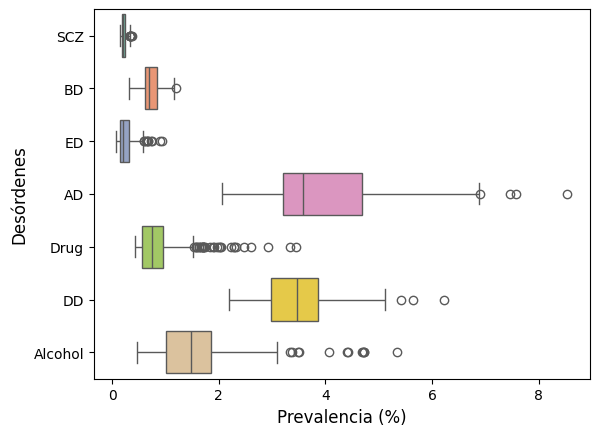

In [8]:
# Escribe tu respuesta aquí

ax = sns.boxplot(data=disorders, orient="h", palette="Set2")
ax.set_xlabel("Prevalencia (%)", size=12)
ax.set_ylabel("Desórdenes", size=12)
desordenes = ["SCZ", "BD", "ED", "AD", "Drug", "DD", "Alcohol"]
ax.set_yticklabels(desordenes)
plt.show()

### Análisis de correlación

- Ahora, explora si existen correlaciones entre las prevalencias de algunas de las condiciones de salud mental listadas. Primero calcula coeficientes de correlación de Spearman y luego crea un mapa de calor que facilite su interpretación.

In [9]:
new_disorders = disorders.rename(
    columns={
        "schizophrenia": "SCZ",
        "bipolar_disorder": "BD",
        "eating_disorders": "ED",
        "anxiety_disorders": "AD",
        "drug_use_disorders": "Drug",
        "depression": "DD",
        "alcohol_use_disorders": "Alcohol",
    }
)
new_disorders.corr(method="spearman")

,SCZ,BD,ED,AD,Drug,DD,Alcohol
SCZ,1.000000,0.161811,0.601344,0.367426,0.525947,-0.082523,-0.014941
BD,0.161811,1.000000,0.754950,0.579532,0.420843,0.080584,0.184800
ED,0.601344,0.754950,1.000000,0.608869,0.612022,0.076957,0.233868
AD,0.367426,0.579532,0.608869,1.000000,0.630539,0.346053,-0.056924
Drug,0.525947,0.420843,0.612022,0.630539,1.000000,0.228203,-0.083407
DD,-0.082523,0.080584,0.076957,0.346053,0.228203,1.000000,-0.149603
Alcohol,-0.014941,0.184800,0.233868,-0.056924,-0.083407,-0.149603,1.000000


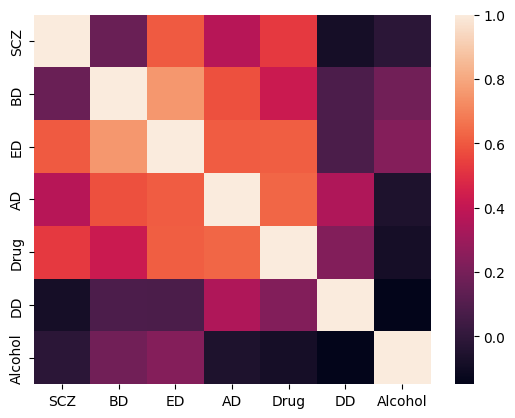

In [10]:
heatmap = sns.heatmap(new_disorders.corr(method="spearman"))
plt.show()

- Crea una matriz de gráficos de dispersión de las variables.
(Pista: Utiliza la función pairplot del paquete seaborn).  

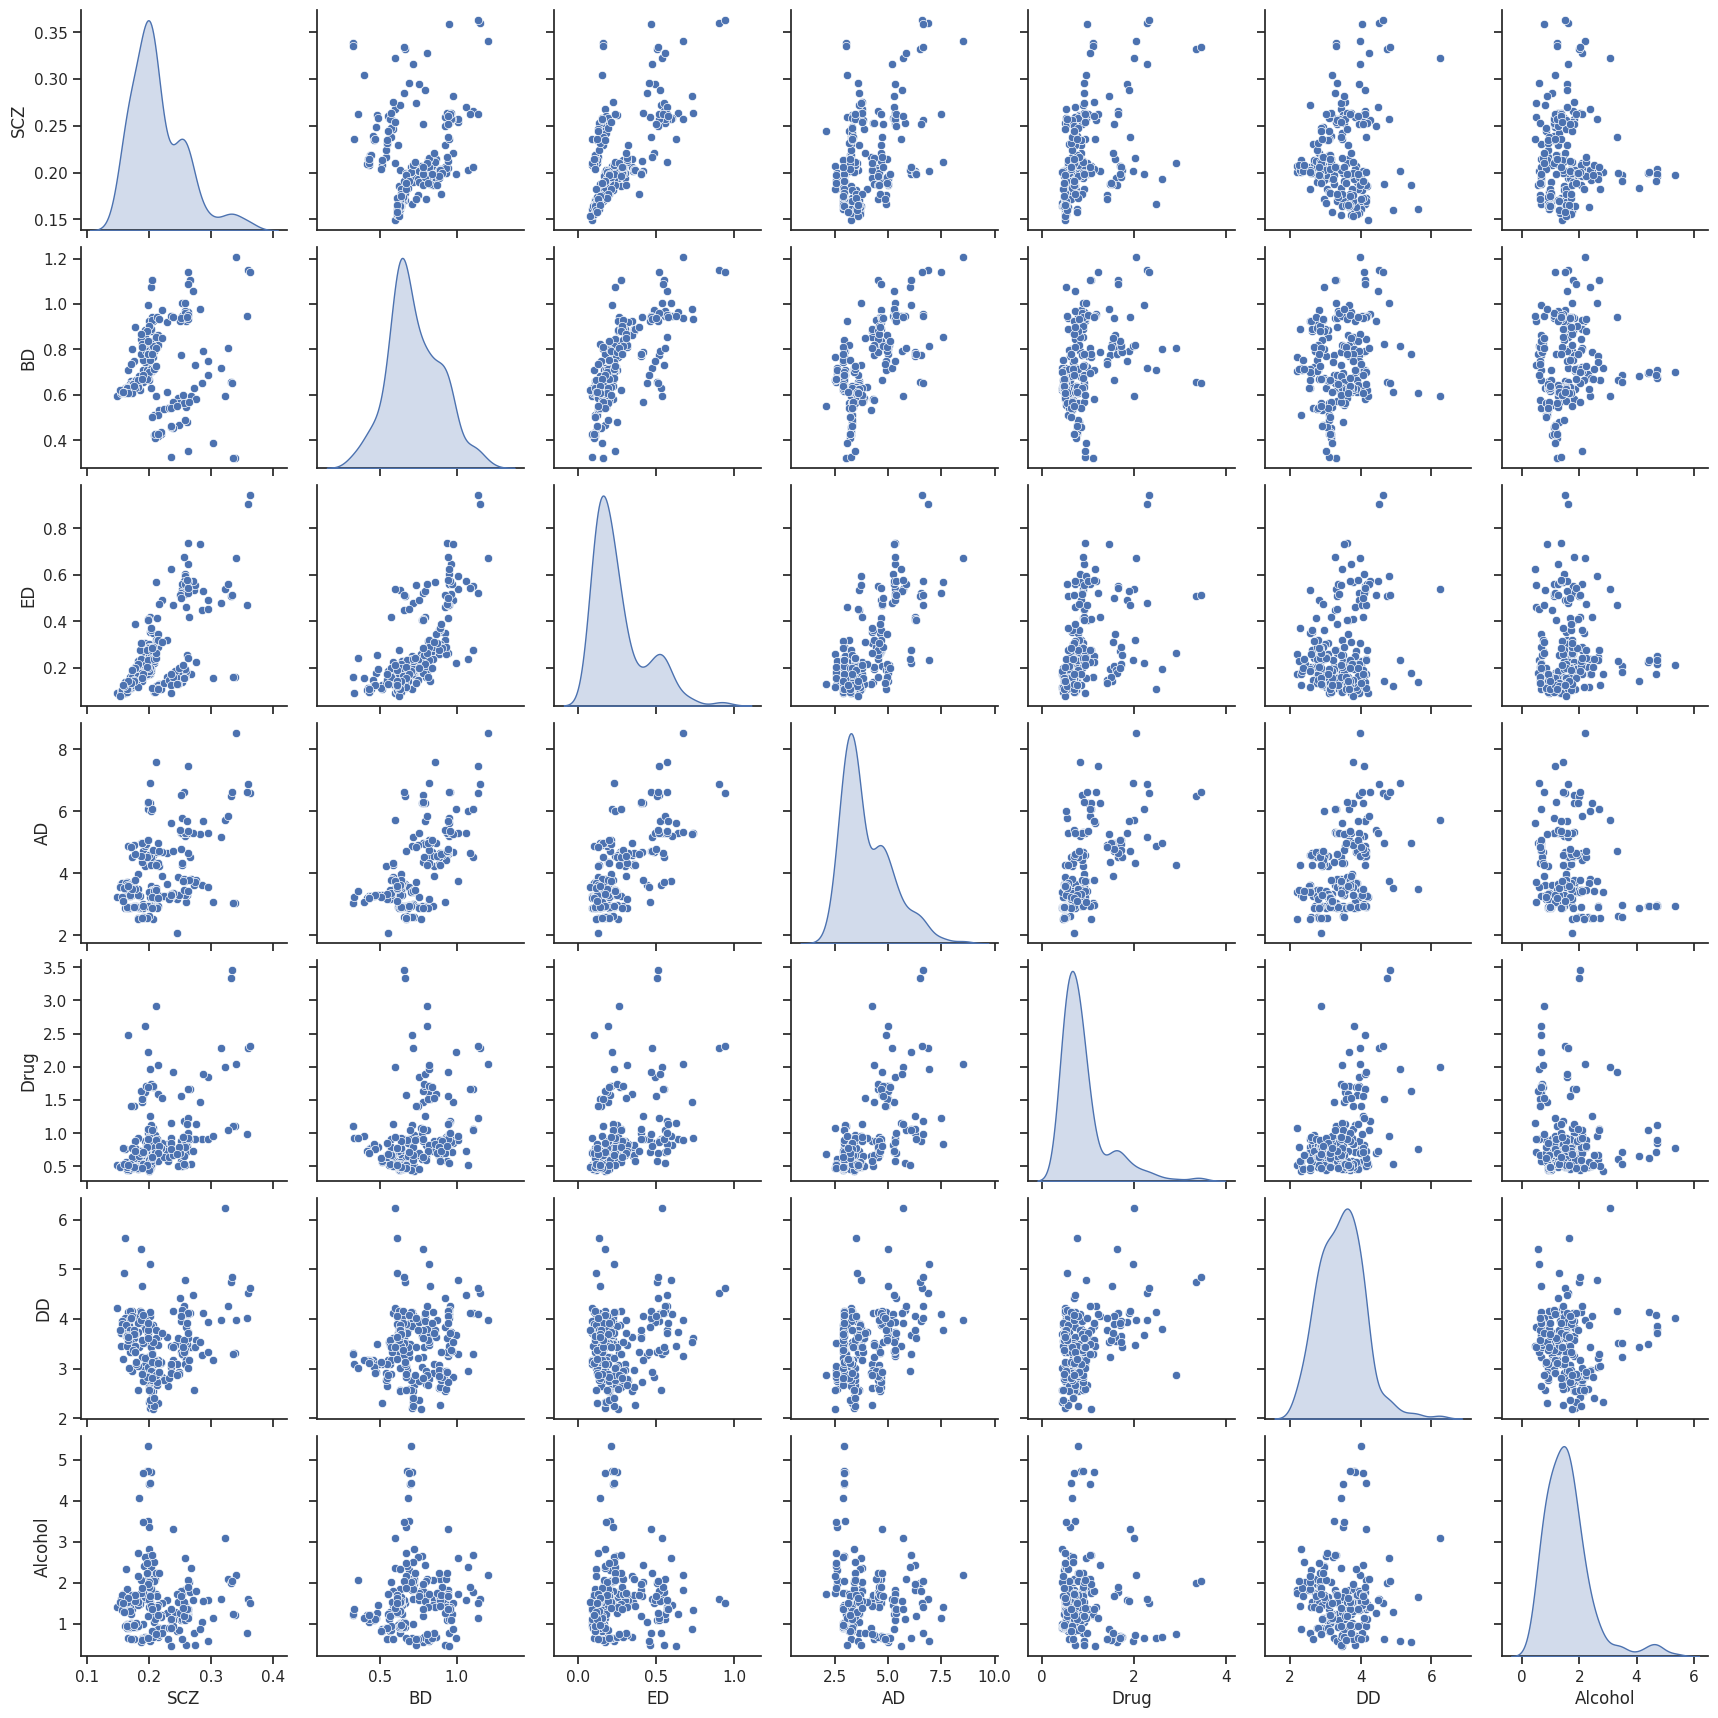

In [11]:
sns.set_theme(style="ticks")
sns.pairplot(new_disorders, diag_kind="kde")
plt.show()

- Verifica la significancia de las correlaciones calculadas.

In [12]:
new_disorders.rcorr(method="spearman")

/home/renato/.virtualenvs/python/lib/python3.10/site-packages/pingouin/correlation.py:1111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,SCZ,BD,ED,AD,Drug,DD,Alcohol
SCZ,-,*,***,***,***,,
BD,0.162,-,***,***,***,,**
ED,0.601,0.755,-,***,***,,***
AD,0.367,0.58,0.609,-,***,***,
Drug,0.526,0.421,0.612,0.631,-,***,
DD,-0.083,0.081,0.077,0.346,0.228,-,*
Alcohol,-0.015,0.185,0.234,-0.057,-0.083,-0.15,-


In [13]:
pg.pairwise_corr(method="spearman", padjust="bonferroni", data=new_disorders)

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,SCZ,BD,spearman,two-sided,231,0.161811,"[0.03, 0.28]",1.380798e-02,2.899676e-01,bonferroni,0.694878
1,SCZ,ED,spearman,two-sided,231,0.601344,"[0.51, 0.68]",4.179462e-24,8.776870e-23,bonferroni,1.000000
2,SCZ,AD,spearman,two-sided,231,0.367426,"[0.25, 0.47]",8.576044e-09,1.800969e-07,bonferroni,0.999946
3,SCZ,Drug,spearman,two-sided,231,0.525947,"[0.43, 0.61]",7.821399e-18,1.642494e-16,bonferroni,1.000000
4,SCZ,DD,spearman,two-sided,231,-0.082523,"[-0.21, 0.05]",2.114567e-01,1.000000e+00,bonferroni,0.239840
5,SCZ,Alcohol,spearman,two-sided,231,-0.014941,"[-0.14, 0.11]",8.213081e-01,1.000000e+00,bonferroni,0.055803
6,BD,ED,spearman,two-sided,231,0.754950,"[0.69, 0.81]",7.587907e-44,1.593460e-42,bonferroni,1.000000
7,BD,AD,spearman,two-sided,231,0.579532,"[0.49, 0.66]",4.015403e-22,8.432347e-21,bonferroni,1.000000
8,BD,Drug,spearman,two-sided,231,0.420843,"[0.31, 0.52]",2.487544e-11,5.223842e-10,bonferroni,0.999999
9,BD,DD,spearman,two-sided,231,0.080584,"[-0.05, 0.21]",2.224240e-01,1.000000e+00,bonferroni,0.230841
